In [1]:
import pandas as pd
import matplotlib.pyplot as pyplot
from data.repo import Repo

Getting a single teams points

In [2]:
team = Repo.teams_api.getTeamData(id=1)
team.stats.points_scored

8970

Get points for all nba teams

In [3]:
team_points = []
team_names = []

def getAllTeamsPoints(id=int):
    if id != 31:
        team = Repo.teams_api.getTeamData(id=id)
        team_points.append(team.stats.points_scored)
        team_names.append(team.name)
        getAllTeamsPoints(id + 1)

getAllTeamsPoints(id=1)

In [4]:
points_df = pd.DataFrame({
    "Team":team_names,
    "Points Scored":team_points
})

points_df

,Team,Points Scored
0,Hawks,8970
1,Celtics,8511
2,Pelicans,8687
3,Bulls,8502
4,Cavaliers,8216
5,Mavericks,8654
6,Nuggets,8449
7,Pistons,8904
8,Warriors,9101
9,Rockets,9032


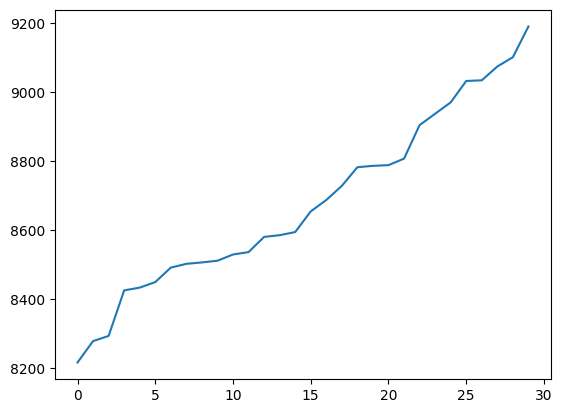

In [5]:
import matplotlib.pyplot as plt
points = points_df["Points Scored"].sort_values()
plt.plot(points.values)

In [6]:
points_df["Points Scored"].values

array([8970, 8511, 8687, 8502, 8216, 8654, 8449, 8904, 9101, 9032, 8788,
       8585, 8728, 8278, 8433, 8807, 8506, 8786, 8491, 8293, 8529, 8536,
       9074, 9190, 8937, 8782, 8594, 8580, 8425, 9034], dtype=int64)

Some Statistics

In [7]:
discription = ["Max","Average","Median", "Min", "Range"]
values = [0,0,0,0,0]
points_sr = points_df["Points Scored"]

values[0] = max(points_sr)
values[1] = sum(points_sr) / len(points_sr)
values[2] = (points_sr[14] + points_sr[15])/2
values[3] = min(points_sr)
values[4] = values[0] - values[3]

summary = pd.DataFrame({
    "Description":discription,
    "Value":values
})

summary

,Description,Value
0,Max,9190.000000
1,Average,8680.066667
2,Median,8620.000000
3,Min,8216.000000
4,Range,974.000000


Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x22688ac2c10>,
 'caps': [<matplotlib.lines.Line2D at 0x22686597910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2268649db50>],
 'medians': [<matplotlib.lines.Line2D at 0x22688ad5090>],
 'fliers': [<matplotlib.lines.Line2D at 0x22688ad5950>],
 'means': []}

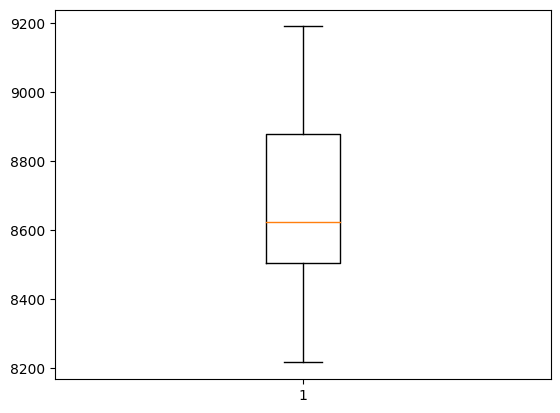

In [8]:
pyplot.boxplot(points_sr)

Using Variance

In [9]:
import math  
# Variance = E(x - xbar)2 / n
mean = values[1]
diviations_sqd = []

for x in range(0, len(points_sr)):
    diviation = (points_sr[x] - mean) * (points_sr[x] - mean)
    diviations_sqd.append(diviation)

sumOfDiviation = sum(diviations_sqd)
variance = sumOfDiviation/30
print(f"Variance: {round(variance)}")

Variance: 66562


Standard Diviation

In [10]:
sd = math.sqrt(variance)
print(f"Standard Diviation : {round(sd)}")

Standard Diviation : 258


Saving this information in a database

In [11]:
from data.database.db import Database

# Create table to store points
db = Database()
cursor = db.cursor
sql_base = """
    insert into table team_points (
        date DATETIME PRIMARY KEY DEFAULT now(),
"""

teams_string = ""

In [12]:
# Get all the abbr all the teams
teams = Repo.db.getTeamIDS()
abbrvs = teams["Abbriviation"].values
abbrvs

for x in abbrvs:
    if x != abbrvs[-1]:
        string = f"{x} INTEGER,"
    else:
        string = f"{x} INTEGER"
    teams_string += string

final_sql = sql_base + teams_string + ");"
final_sql

'\n    create table team_points(\n        date DATETIME PRIMARY KEY DEFAULT now(),\nATL INTEGER,BOS INTEGER,BKN INTEGER,CHA INTEGER,CHI INTEGER,CLE INTEGER,DAL INTEGER,DEN INTEGER,DET INTEGER,GS INTEGER,HOU INTEGER,IND INTEGER,LAC INTEGER,LAL INTEGER,MEM INTEGER,MIA INTEGER,MIL INTEGER,MIN INTEGER,NO INTEGER,NY INTEGER,OKC INTEGER,ORL INTEGER,PHI INTEGER,PHX INTEGER,POR INTEGER,SAC INTEGER,SA INTEGER,TOR INTEGER,UTAH INTEGER,WSH INTEGER);'

Executing Statement

In [13]:
cursor.execute("USE nba;")
cursor.execute(final_sql)

ProgrammingError: 1050 (42S01): Table 'team_points' already exists

inserting data into the table

In [ ]:
base_insert_sql = "insert into nba.team_points values( now(),"
points_string = ""

points = points_sr.values
points

In [ ]:
# Building String
for x in points:
    if x != points[-1]:
        string = f"{x},"
    else:
        string = f"{x}"

    points_string += string

points_string

In [14]:
from data.repo import Repo
Repo.db.insertTeamPointsRow()

In [ ]:
from utils.utils import * 
def insertTeamPointsRow():
        values_str = ""
        points = getAllTeamsPoints(1)
        points = points["Points Scored"].values
        base_sql = base_insert_sql = "insert into nba.team_points values( now(),"
        
        # Building String
        for x in points:
            if x != points[-1]:
                string = f"{x},"
            else:
                string = f"{x}"

            values_str += string

        final_sql = base_insert_sql + values_str + ");"
        return final_sql

insertTeamPointsRow()